## 0. Libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import numpy as np

In [3]:
import shutup
shutup.please()

In [67]:
pip install mlflow

  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached pywin32-311-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached annota

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [51]:
import sklearn

## 1. Data Extraction

Going through the columns and seeing if we need to change a values in the dataset.

In [9]:
df = pd.read_csv("C:/Space X/Documents/ML/Customer-Churn-Project/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 2. Encoding the categorical values

### 2.1 Binary encoding

We have found a few columns that need to be encoded into binary values. Will be covering that in the coming steps. 

In [ ]:
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### 2.2 One Hot Encoding

There are a few columns which have more than 2 unique values. Will be using this to one-hot encode or generate dummies. 

In [19]:
one_hot_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 3. Cleaning

Dropping the customerID column, because it is no way useful.

In [24]:
df.drop('customerID', axis=1, inplace=True)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [27]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

### 3.1 Boolean conversion

There are a lot of Boolean columns as you can see, we need to convert all of these into integers so it is easily processable. 

In [28]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [30]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

### 3.2 Correlation of Features with Churn

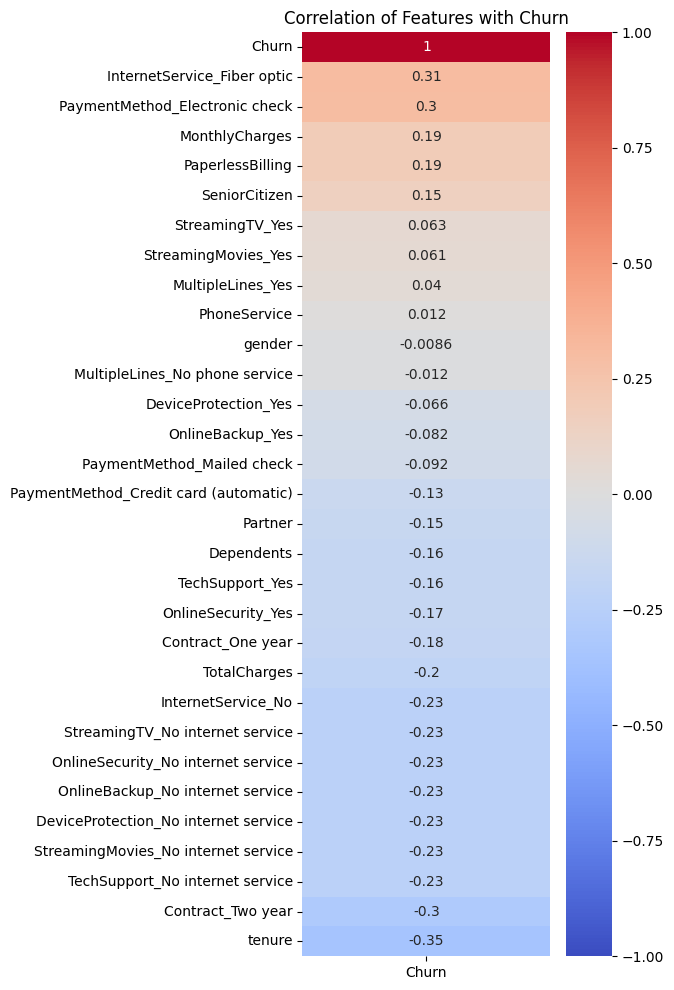

In [35]:
corr_matrix = df.corr(numeric_only=True)

churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True,cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

Higher value to 1 represents that the customers with this feature are more likely to churn. 

Values closer to -1 represents the customers that are less likely to churn. 

## 4. Preprocessing

### 4.1 Checking for redundant features (VIF)

In [36]:
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [37]:
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

c:\Users\sid99\AppData\Local\Python\pythoncore-3.11-64\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

## 5. Machine Learning

In [42]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### 5.1 RandomForest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3

In [55]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.770     0.824      1035
           1      0.532     0.725     0.614       374

    accuracy                          0.758      1409
   macro avg      0.709     0.747     0.719      1409
weighted avg      0.792     0.758     0.768      1409



In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.505   0.791   0.617   
0.3     0.532   0.725   0.614   
0.35    0.549   0.671   0.604   
0.4     0.573   0.620   0.596   
0.45    0.597   0.551   0.573   
0.5     0.624   0.492   0.550   


### 5.2 LightGBM Classifier

In [57]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 1.69 seconds
⏱ Prediction time: 0.0050 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.73

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


### 5.3 XGBoost Classifier

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.70 seconds
⏱ Prediction time: 0.0151 seconds
              precision    recall  f1-score   support

           0      0.910     0.691     0.785      1035
           1      0.486     0.810     0.608       374

    accuracy                          0.722      1409
   macro avg      0.698     0.750     0.697      1409
weighted avg      0.797     0.722     0.738      1409



In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.464   0.834   0.596   
0.3     0.486   0.810   0.608   
0.35    0.498   0.786   0.610   
0.4     0.517   0.751   0.612   
0.45    0.538   0.719   0.616   
0.5     0.546   0.687   0.608   


## 6. Hyperparameter Tuning

In [64]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  
    return recall_score(y_test, y_pred, pos_label=1)  

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-11-05 20:56:59,182] A new study created in memory with name: no-name-c7daa421-b3ad-4e12-8c1a-9a618a1624ae
[I 2025-11-05 20:56:59,621] Trial 0 finished with value: 0.8689839572192514 and parameters: {'n_estimators': 762, 'learning_rate': 0.12610105229140564, 'max_depth': 8, 'subsample': 0.8025453698146352, 'colsample_bytree': 0.7505545535395477, 'min_child_weight': 2, 'gamma': 1.4857088667860419, 'reg_alpha': 4.988767674479348, 'reg_lambda': 3.7795017652560703}. Best is trial 0 with value: 0.8689839572192514.
[I 2025-11-05 20:57:00,101] Trial 1 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 403, 'learning_rate': 0.012323641185673943, 'max_depth': 6, 'subsample': 0.8381642308137272, 'colsample_bytree': 0.8566219259223661, 'min_child_weight': 2, 'gamma': 2.557862748774377, 'reg_alpha': 1.8574052411243462, 'reg_lambda': 2.222219306973127}. Best is trial 1 with value: 0.9090909090909091.
[I 2025-11-05 20:57:00,308] Trial 2 finished with value: 0.88235294117

Best Params: {'n_estimators': 624, 'learning_rate': 0.01248489833793245, 'max_depth': 4, 'subsample': 0.7171741600589834, 'colsample_bytree': 0.9459289055518183, 'min_child_weight': 5, 'gamma': 4.413497976594401, 'reg_alpha': 3.4815018814252947, 'reg_lambda': 2.568961634639811}
Best Recall: 0.9144385026737968


In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

xgb = XGBClassifier(**best_params)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.59 seconds
⏱ Prediction time: 0.0046 seconds
              precision    recall  f1-score   support

           0      0.950     0.582     0.721      1035
           1      0.441     0.914     0.595       374

    accuracy                          0.670      1409
   macro avg      0.695     0.748     0.658      1409
weighted avg      0.815     0.670     0.688      1409



## 7. Experimentation

In [68]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    mlflow.log_params(best_params)

    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)


    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)


    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)


    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

MlflowException: file://c:\Space X\Documents\ML\Customer-Churn-Project/mlruns is not a valid remote uri. For remote access on windows, please consider using a different scheme such as SMB (e.g. smb://<hostname>/<path>).